Voici notre projet :)

In [120]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np

filename = "Commandes_clients.csv"
df = pd.read_csv(filename)

idselect = 75

print(df.head(30))

    IdCommande  IdClient  IdProduit  Date  Quantite
0            1        75          5  1995        50
1            2        75          6  1996       175
2            3        75          1  1996       225
3            4        75          7  1996       150
4            5        75          5  1997        25
5            6        75          1  1998        25
6            7        75         10  1998        75
7            8        75          3  1998       175
8            9        75          9  1998       150
9           10        75          8  1999       225
10          11        75          6  2000        25
11          12        75          2  2000       200
12          13        85          2  2001        25
13          14        85          8  2001       150
14          15        85          1  2001        75
15          16        85          8  2001       250
16          17        35          9  2001       175
17          18        35          3  2001       225
18          

In [121]:
remises = [70, 40, 20, 20, 20, 60, 40, 30, 10, 60, 80, 30]
produit = [ 6,  6,  7,  2,  8,  3,  8,  5,  1, 10,  3,  5]
client =  [75, 14, 35, 38, 75, 15,  5, 98, 87, 54, 75, 25]
df_remises = pd.DataFrame({'Remise': remises,'IdProduit': produit, 'IdClient': client})
print(df_remises.head(12))

    Remise  IdProduit  IdClient
0       70          6        75
1       40          6        14
2       20          7        35
3       20          2        38
4       20          8        75
5       60          3        15
6       40          8         5
7       30          5        98
8       10          1        87
9       60         10        54
10      80          3        75
11      30          5        25


In [122]:
prix =      [83, 24, 34, 95, 82,  3, 18, 29, 95, 63]
marge =     [ 3, 10, 23, 61,  8, 50,  8, 20, 11, 37]
nom =       ["Colle", "Clous", "Choux", "Café", "Craies", "Chaudron", "Clefs", "Cavalier", "Chauffeur", "Clés"]
Idproduit = [i for i in range(1, 11)]
df_produit = pd.DataFrame({'Prix': prix,'Marge': marge, 'Nom': nom}, index=Idproduit)
print(df_produit.head(10))

    Prix  Marge        Nom
1     83      3      Colle
2     24     10      Clous
3     34     23      Choux
4     95     61       Café
5     82      8     Craies
6      3     50   Chaudron
7     18      8   Classeur
8     29     20   Cavalier
9     95     11  Chauffeur
10    63     37       Clés


In [124]:
nomClient = ["Client n°{}".format(i) for i in range(1, 101)]
nomClient[75] = "Culturo"
nomClient[14] = "Fnic"
nomClient[35] = "Garty"
nomClient[38] = "Habitons"
nomClient[85] = "Auchun"
nomClient[15] = "Unionmarché"
for i in nomClient:
    print(i)
iter = True
while iter:    
    nomSelect = input("Sélection : ")
    iter = not(nomSelect in nomClient)
idselect = nomClient.index(nomSelect)

Client n°1
Client n°2
Client n°3
Client n°4
Client n°5
Client n°6
Client n°7
Client n°8
Client n°9
Client n°10
Client n°11
Client n°12
Client n°13
Client n°14
Fnic
Unionmarché
Client n°17
Client n°18
Client n°19
Client n°20
Client n°21
Client n°22
Client n°23
Client n°24
Client n°25
Client n°26
Client n°27
Client n°28
Client n°29
Client n°30
Client n°31
Client n°32
Client n°33
Client n°34
Client n°35
Garty
Client n°37
Client n°38
Habitons
Client n°40
Client n°41
Client n°42
Client n°43
Client n°44
Client n°45
Client n°46
Client n°47
Client n°48
Client n°49
Client n°50
Client n°51
Client n°52
Client n°53
Client n°54
Client n°55
Client n°56
Client n°57
Client n°58
Client n°59
Client n°60
Client n°61
Client n°62
Client n°63
Client n°64
Client n°65
Client n°66
Client n°67
Client n°68
Client n°69
Client n°70
Client n°71
Client n°72
Client n°73
Client n°74
Client n°75
Culturo
Client n°77
Client n°78
Client n°79
Client n°80
Client n°81
Client n°82
Client n°83
Client n°84
Client n°85
Auchun
Cl

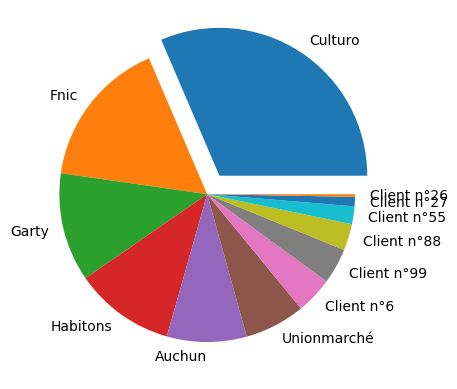

In [125]:
cost = [df["Quantite"][i]*df_produit["Prix"][df["IdProduit"][i]] for i in df.index]

df["Cost"] = cost

df_importance = df.groupby(["IdClient"]).sum().sort_values(by="Cost", ascending=False)

total = df["Cost"].sum()
explosion = [0] * df_importance.shape[0]
explosion[list(df_importance.index).index(idselect)] = 0.15
camLabel = []
for i in list(df_importance.index):
    camLabel.append(nomClient[i])

plt.pie(df_importance["Cost"], labels = camLabel, explode = explosion)
plt.show()

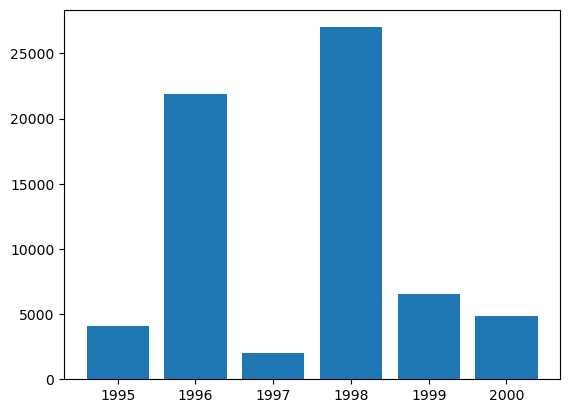

In [126]:
df_client = df[df["IdClient"]==idselect]
df_histo = df_client.groupby(["Date"]).sum().sort_values(by="Date", ascending=True)
plt.bar(height = df_histo["Cost"], x = list(df_histo.index))
plt.show()

In [127]:
df_remisesClient = df_remises[df_remises["IdClient"]==idselect]
print("Pour le client", nomClient[idselect], ":")
if list(df_remisesClient.index):
    for i in list(df_remisesClient.index):
        print("Remise de {}% sur le produit n°{} ({})".format(df_remisesClient["Remise"][i], df_remisesClient["IdProduit"][i], df_produit["Nom"][df_remisesClient["IdProduit"][i]]))
else:
    print("Pas de remise pour ce client")

Pour le client Culturo :
Remise de 70% sur le produit n°6 (Chaudron)
Remise de 20% sur le produit n°8 (Cavalier)
Remise de 80% sur le produit n°3 (Choux)


In [128]:
best = [-1, -1]
score_max = 0

df_clientPProduit = df_client.groupby(["IdProduit"]).sum()

for i in list(df_client.index):
    if not(df_client["IdProduit"][i] in list(df_remisesClient["IdProduit"])):
        if df_produit["Marge"][df_client["IdProduit"][i]] > 11:
            margeP = df_produit["Marge"][df_client["IdProduit"][i]]
            qteP = df_clientPProduit["Quantite"][df_client["IdProduit"][i]]
            prixP = df_produit["Prix"][df_client["IdProduit"][i]]
            score = margeP * qteP * prixP
            if score > score_max:
                score_max = score
                propRemise = rd.randint(1, int(df_produit["Marge"][df_client["IdProduit"][i]]/10)-1)
                best = [df_client["IdProduit"][i], propRemise * 10]

if score_max != 0:
    print("Remise avantageuse détectée !")
    print("Conseil : accordez {}% de remise au client {} sur le produit n°{} ({}), afin de le fidéliser !".format(best[1], nomClient[idselect], best[0], df_produit["Nom"][best[0]]))
else:
    print("Pas de remise suggérée... :(")

Remise avantageuse détectée !
Conseil : accordez 10% de remise au client Culturo sur le produit n°10 (Clés), afin de le fidéliser !
